<a href="https://colab.research.google.com/github/lucevito/image/blob/main/MLP_slip_len(X1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [3]:
def printPlotLoss(history, d):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    #plt.savefig("plotLoss" + str(d) + ".png")
    plt.show()
    plt.close()

def printPlotAccuracy(history, d):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    #plt.savefig("plotAccuracy" + str(d) + ".png")
    plt.show()
    plt.close()

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc
from imblearn.metrics import geometric_mean_score
import pandas as pd
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows
def print_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision_negative = precision_score(y_true, y_pred, pos_label=0)
    recall_negative = recall_score(y_true, y_pred, pos_label=0)
    fscore_negative = f1_score(y_true, y_pred, pos_label=0)
    precision_positive = precision_score(y_true, y_pred, pos_label=1)
    recall_positive = recall_score(y_true, y_pred, pos_label=1)
    fscore_positive = f1_score(y_true, y_pred, pos_label=1)
    average_accuracy = (accuracy_score(y_true, y_pred) +
                        accuracy_score(y_true, y_pred, normalize=False)) / 2
    overall_accuracy = accuracy_score(y_true, y_pred)
    gmean = geometric_mean_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    print("True Negative (TN):", tn)
    print("False Negative (FN):", fn)
    print("False Positive (FP):", fp)
    print("True Positive (TP):", tp)
    print("Precision (Negative Class):", precision_negative)
    print("Recall (Negative Class):", recall_negative)
    print("F-score (Negative Class):", fscore_negative)
    print("Precision (Positive Class):", precision_positive)
    print("Recall (Positive Class):", recall_positive)
    print("F-score (Positive Class):", fscore_positive)
    print("Average Accuracy:", average_accuracy)
    print("Overall Accuracy:", overall_accuracy)
    print("G-Mean:", gmean)
    print("AUC (Area Under the Curve):", roc_auc)
    print("\n")

def save_csv(model_name, dataset_name, param, y_true, y_pred):
  file_name = 'risultati_modelli.xlsx'
  cm = confusion_matrix(y_true, y_pred)
  tn, fp, fn, tp = cm.ravel()
  precision_negative = precision_score(y_true, y_pred, pos_label=0)
  recall_negative = recall_score(y_true, y_pred, pos_label=0)
  fscore_negative = f1_score(y_true, y_pred, pos_label=0)
  precision_positive = precision_score(y_true, y_pred, pos_label=1)
  recall_positive = recall_score(y_true, y_pred, pos_label=1)
  fscore_positive = f1_score(y_true, y_pred, pos_label=1)
  average_accuracy = (accuracy_score(y_true, y_pred) +
                      accuracy_score(y_true, y_pred, normalize=False)) / 2
  overall_accuracy = accuracy_score(y_true, y_pred)
  gmean = geometric_mean_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred)

  results = [
      {
          'Modello': model_name,
          'Dataset': dataset_name,
          'Parametri della configurazione': param,
          'True Negative': tn,
          'False Negative': fn,
          'False Positive': fp,
          'True Positive': tp,
          'Precision Negative': precision_negative,
          'Recall Negative': recall_negative,
          'Fscore Negative': fscore_negative,
          'Precision Positive': precision_positive,
          'Recall Positive': recall_positive,
          'Fscore Positive': fscore_positive,
          'Average Accuracy': average_accuracy,
          'Overall Accuracy': overall_accuracy,
          'GMean': gmean,
          'AUC': roc_auc,
      },
  ]

  if os.path.exists(file_name):
      existing_df = pd.read_excel(file_name)
      df = pd.concat([existing_df, pd.DataFrame(results)])
  else:
      df = pd.DataFrame(results)
  wb = Workbook()
  ws = wb.active
  for r in dataframe_to_rows(df, index=False, header=True):
      ws.append(r)
  wb.save(file_name)


In [5]:
from sklearn.preprocessing import MinMaxScaler
import glob
import numpy as np

def loaddataset(directory):
  images_files = glob.glob(directory + '/images' + '/*.npy')
  masks_files = glob.glob(directory + '/masks' + '/*.npy')
  x = np.array([np.load(file) for file in images_files])
  y = np.array([np.load(file) for file in masks_files])
  x = x.reshape(len(x) * len(x[0]) * len(x[0][0]), 10)
  y = y.reshape(len(y) * len(y[0]) * len(y[0][0]), 1)
  y = np.ravel(y)
  scaler=MinMaxScaler()
  x=scaler.fit_transform(x)
  return x,y

In [6]:
def selectSet(X, Y, target_class):
  mask = (Y == target_class)
  selectionX = X[mask]
  selectionY = Y[mask]
  return selectionX, selectionY

def sampling(X, Y, n):
    indices = np.random.choice(len(X), n, replace=False)
    sampleX = X[indices]
    sampleY = Y[indices]
    return sampleX, sampleY

def concatenate(X1, X2, Y1, Y2):
    X = np.concatenate((X1, X2), axis=0)
    Y = np.concatenate((Y1, Y2), axis=0)
    return X, Y


In [7]:
import tensorflow
from keras.layers import Input, Dense
from keras import optimizers
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras import callbacks
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model


def MLP_architecture(train_X):
    n_col = train_X.shape[1]
    input = Input(shape=(n_col,))

    hidden1 = Dense(128, activation='relu',
                    kernel_initializer='glorot_uniform',
                    name='l1')(input)
    hidden2= Dense(64, activation='relu',
                    kernel_initializer='glorot_uniform',
                    name='l2')(hidden1)

    hidden3 = Dense(32, activation='relu',
               kernel_initializer='glorot_uniform',
               name='l3')(hidden2)
    output=Dense(2,activation='softmax')(hidden3)
    model=Model(inputs=input, outputs=output)
    model.summary()
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.0001)) #change this
    return model

In [8]:
from sklearn.model_selection import train_test_split
from keras import callbacks
from keras.utils import np_utils
import matplotlib.pyplot as plt

import joblib
def train(X,Y,model_name):
  model=MLP_architecture(X)
  callbacks_list = [
      callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=20, restore_best_weights=True), ]

  XTraining, XValidation, YTraining, YValidation = train_test_split(X, Y, stratify=Y, test_size=0.2)
  YTraining = np_utils.to_categorical(YTraining, 2)
  YValidation = np_utils.to_categorical(YValidation, 2)
  weights = {0 : 0.40, 1: 0.60}
  #,class_weight=weights
  history = model.fit(XTraining, YTraining, batch_size=32, epochs=200 ,verbose=2, callbacks=callbacks_list
                , shuffle= True , validation_data=(XValidation, YValidation))

  printPlotAccuracy(history, 'MLP')
  printPlotLoss(history, 'MLP')
  joblib.dump(model, model_name)


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
import os
def predict(model_name,param,testX,testY,trainX,trainY,X,Y):
    model = joblib.load(model_name)
    y_predicted = model.predict(testX, verbose=0, use_multiprocessing=True, workers=12)
    y_predicted = np.argmax(y_predicted, axis=1)
    print("CLassification test: ")
    print(classification_report(testY,y_predicted))
    print("TEST : ")
    print_metrics(testY,y_predicted)
    save_csv(model_name, 'Test Set', param, testY, y_predicted)


    print("TRAIN : ")
    y_predicted = model.predict(trainX, verbose=0, use_multiprocessing=True, workers=12)
    y_predicted = np.argmax(y_predicted, axis=1)
    print("CLassification train: ")
    print(classification_report(trainY, y_predicted))
    print_metrics(trainY,y_predicted)
    save_csv(model_name, 'Train Set', param, trainY, y_predicted)

    print("Sample : ")
    y_predicted = model.predict(X, verbose=0, use_multiprocessing=True, workers=12)
    y_predicted = np.argmax(y_predicted, axis=1)
    print("CLassification sample: ")
    print(classification_report(Y, y_predicted))
    print_metrics(Y,y_predicted)
    save_csv(model_name, 'Sample Set', param, Y, y_predicted)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 l1 (Dense)                  (None, 128)               1408      
                                                                 
 l2 (Dense)                  (None, 64)                8256      
                                                                 
 l3 (Dense)                  (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 11,810
Trainable params: 11,810
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
1177/1177 - 4s - loss: 0.6922 - accuracy: 0.5153 - val_loss: 0.6910 - val_accuracy: 0.5223 - 4s/epoch - 4ms/step
Epoch 2/200
1177/1177 - 3s - loss: 0.6906 - accuracy: 0.5250 - val_loss: 0.6887 - val_accuracy: 0.5323 - 3s/epoch - 3ms/step
Epoch 3/200
1177/1177 - 3s - loss: 0.6884 - accuracy: 0.5317 - val_loss: 0.6879 - val_accuracy: 0.5342 - 3s/epoch - 2ms/step
Epoch 4/200
1177/1177 - 3s - loss: 0.6864 - accuracy: 0.5370 - val_loss: 0.6880 - val_accuracy: 0.5376 - 3s/epoch - 2ms/step
Epoch 5/200
1177/1177 - 2s - loss: 0.6839 - accuracy: 0.5387 - val_loss: 0.6839 - val_accuracy: 0.5399 - 2s/epoch - 2ms/step
Epoch 6/200
1177/1177 - 3s - loss: 0.6821 - accuracy: 0.5473 - val_loss: 0.6839 - val_accuracy: 0.5323 - 3s/epoch - 2ms/step
Epoch 7/200
1177/1177 - 3s - loss: 0.6810 - accuracy: 0.5487 - val_loss: 0.6839 - val_accuracy: 0.5352 - 3s/epoch - 3ms/step
Epoch 8/200
1177/1177 - 2s - loss: 0.6791 - accuracy: 0.5549 - val_loss: 0.6777 - val_accuracy: 0.5514 - 2s/epoch - 2ms/step


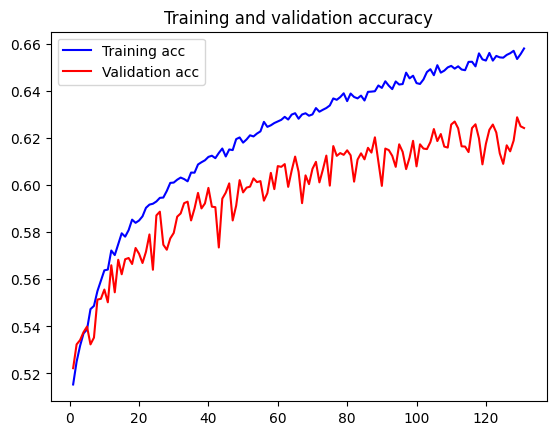

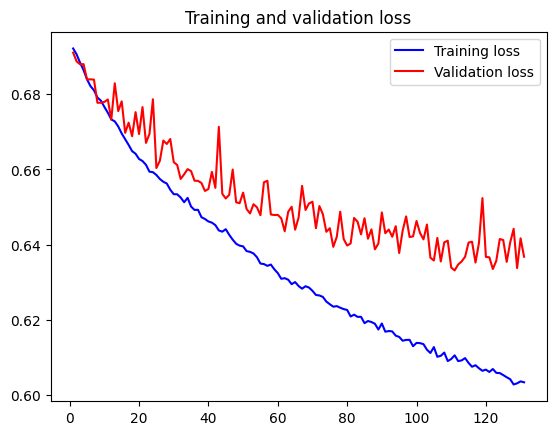

CLassification test: 
              precision    recall  f1-score   support

           0       0.98      0.70      0.82    162100
           1       0.02      0.29      0.03      2764

    accuracy                           0.69    164864
   macro avg       0.50      0.49      0.42    164864
weighted avg       0.97      0.69      0.81    164864

TEST : 
True Negative (TN): 113606
False Negative (FN): 1974
False Positive (FP): 48494
True Positive (TP): 790
Precision (Negative Class): 0.9829209205744939
Recall (Negative Class): 0.7008389882788402
F-score (Negative Class): 0.8182512244309996
Precision (Positive Class): 0.016029543056570082
Recall (Positive Class): 0.2858176555716353
F-score (Positive Class): 0.030356593913310793
Average Accuracy: 57198.34694050854
Overall Accuracy: 0.6938810170807453
G-Mean: 0.44756246107449055
AUC (Area Under the Curve): 0.4933283219252378


TRAIN : 
CLassification train: 
              precision    recall  f1-score   support

           0       0.98   

In [10]:

train_path = 'Immagini_satellitari/Train'
test_path = 'Immagini_satellitari/Test/'
model_name = "mlp split len(x1).h"
param = 'mlp split len(x1)'

trainX,trainY = loaddataset(train_path)
testX,testY = loaddataset(test_path)

X1,Y1 = selectSet(trainX, trainY, 1)
X0,Y0 = selectSet(trainX, trainY, 0)
X1,Y1 = sampling(X1, Y1, len(X1))
X0,Y0 = sampling(X0, Y0, len(X1))
X,Y = concatenate(X1, X0, Y1, Y0)

train(X,Y,model_name)
predict(model_name,param,testX,testY,trainX,trainY,X,Y)